# Comparing Topic Models

* Use Mallet LDA latter
* https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
* https://radimrehurek.com/gensim/models/wrappers/ldamallet.html

In [26]:
import pickle
from gensim.models import CoherenceModel, HdpModel, LdaModel, LsiModel
from gensim.corpora import Dictionary, MmCorpus
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')

In [2]:
hdpmodel = HdpModel.load('./data/MR_hdp_model_spacy_2014.gensim')
dictionary = Dictionary.load('./data/MR_hdp_dictionary_2014.dict')
corpus = MmCorpus('./data/MR_hdp_corpus_2014.mm')

In [16]:
with open("./data/MR_sentences_2014.txt", "rb") as fp:   # Unpickling
    texts = pickle.load(fp)

## Comparing Words of each Topic

In [24]:
hdpmodel.show_topics()[:10]

[(0,
  "0.019*man + 0.018*woman + 0.011*people + 0.011*think + 0.008*like + 0.007*feminist + 0.006*thing + 0.005*say + 0.005*want + 0.005*way + 0.005*know + 0.004*rape + 0.004*' + 0.004*issue + 0.004*gender + 0.004*right + 0.004*feminism + 0.004*mean + 0.004*good + 0.004*go"),
 (1,
  "0.017*man + 0.016*woman + 0.011*people + 0.011*think + 0.009*like + 0.008*feminist + 0.006*thing + 0.005*say + 0.005*way + 0.005*feminism + 0.005*want + 0.005*' + 0.004*know + 0.004*issue + 0.004*mean + 0.004*gender + 0.004*point + 0.004*good + 0.004*rape + 0.003*go"),
 (2,
  "0.014*man + 0.013*woman + 0.012*think + 0.011*people + 0.009*like + 0.008*feminist + 0.006*thing + 0.006*say + 0.005*comment + 0.005*know + 0.005*want + 0.005*way + 0.004*' + 0.004*feminism + 0.004*mean + 0.004*issue + 0.004*point + 0.004*good + 0.004*go + 0.003*post"),
 (3,
  "0.012*woman + 0.012*man + 0.011*think + 0.010*people + 0.008*like + 0.007*feminist + 0.006*say + 0.005*thing + 0.005*know + 0.004*mean + 0.004*comment + 0.00

In [11]:
lda_hdpmodel = hdpmodel.suggested_lda_model()

In [25]:
lda_hdpmodel.show_topics()

[(149,
  '0.000*"availability" + 0.000*"sq" + 0.000*"vfw" + 0.000*"reliable" + 0.000*"bauer" + 0.000*"effectiveattraction" + 0.000*"propositional" + 0.000*"darken" + 0.000*"thehat" + 0.000*"cannon"'),
 (147,
  '0.000*"xnazv" + 0.000*"bay" + 0.000*"drunkard" + 0.000*"discouraged" + 0.000*"hyperpuritanism" + 0.000*"chirp" + 0.000*"immunisation" + 0.000*"xhh" + 0.000*"proportional" + 0.000*"nyong\'o"'),
 (148,
  '0.000*"conoisseur" + 0.000*"gilbert" + 0.000*"ant" + 0.000*"jfc" + 0.000*"downplay" + 0.000*"handyperson" + 0.000*"cjaxi" + 0.000*"kuwjnbjqr" + 0.000*"diarrhea" + 0.000*"rapeability"'),
 (143,
  '0.000*"cozy" + 0.000*"philosophic" + 0.000*"limitation" + 0.000*"kepc" + 0.000*"venison" + 0.000*"ealry" + 0.000*"convince" + 0.000*"robillion" + 0.000*"wikipedian" + 0.000*"timidly"'),
 (146,
  '0.000*"raymond" + 0.000*"sift" + 0.000*"vineyard" + 0.000*"srujh" + 0.000*"incursion" + 0.000*"artifician" + 0.000*"disprivileged" + 0.000*"broom" + 0.000*"eudaimondaimon" + 0.000*"agrarian"'),


In [10]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [12]:
ldamodel.show_topics()

[(0,
  '0.065*"man" + 0.064*"woman" + 0.013*"gender" + 0.012*"think" + 0.009*"people" + 0.008*"society" + 0.007*"male" + 0.007*"way" + 0.007*"thing" + 0.006*"issue"'),
 (1,
  '0.016*"game" + 0.014*"male" + 0.013*"female" + 0.012*"sex" + 0.011*"sexual" + 0.008*"character" + 0.008*"gay" + 0.008*"play" + 0.008*"medium" + 0.008*"like"'),
 (2,
  '0.057*"com" + 0.053*"http_femradebate" + 0.029*"http_www" + 0.028*"comment" + 0.027*"post" + 0.017*"article" + 0.015*"reddit_com" + 0.011*"r" + 0.011*"http" + 0.010*"link"'),
 (3,
  '0.028*"study" + 0.009*"research" + 0.008*"number" + 0.007*"science" + 0.007*"pdf" + 0.007*"datum" + 0.007*"find" + 0.007*"circumcision" + 0.006*"http_www" + 0.006*"difference"'),
 (4,
  '0.060*"rape" + 0.019*"consent" + 0.019*"victim" + 0.012*"case" + 0.012*"person" + 0.011*"sex" + 0.010*"crime" + 0.010*"rapist" + 0.010*"law" + 0.007*"say"'),
 (5,
  '0.036*"comment" + 0.032*"user" + 0.032*"rule" + 0.032*"ban" + 0.029*"r_femradebate" + 0.026*"mod" + 0.025*"sub" + 0.014*

In [27]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [28]:
lsimodel.show_topics()

[(0,
  '0.488*"man" + 0.453*"woman" + 0.233*"think" + 0.226*"people" + 0.190*"feminist" + 0.173*"like" + 0.132*"thing" + 0.128*"feminism" + 0.106*"gender" + 0.106*"issue"'),
 (1,
  '-0.434*"man" + -0.418*"woman" + 0.298*"people" + -0.296*"http_femradebate" + -0.253*"com" + 0.228*"think" + 0.205*"feminist" + 0.178*"like" + 0.129*"thing" + 0.120*"feminism"'),
 (2,
  '0.637*"http_femradebate" + 0.536*"com" + -0.282*"man" + -0.231*"woman" + 0.229*"people" + 0.138*"gender" + 0.099*"sex" + 0.096*"person" + 0.073*"post" + 0.064*"privilege"'),
 (3,
  '0.608*"feminist" + 0.432*"feminism" + -0.321*"rape" + 0.188*"mra" + -0.172*"people" + -0.144*"woman" + 0.130*"movement" + 0.124*"mrm" + 0.104*"issue" + -0.104*"sex"'),
 (4,
  '0.780*"rape" + 0.242*"man" + -0.214*"woman" + 0.178*"feminist" + -0.164*"like" + 0.131*"victim" + 0.116*"consent" + -0.105*"people" + -0.101*"think" + 0.091*"rapist"'),
 (5,
  '0.654*"woman" + -0.594*"man" + 0.268*"feminist" + 0.206*"rape" + 0.124*"feminism" + -0.099*"think

## Comparing coherence

In [30]:
hdp = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
lda_hdp = [[word for word, prob in topic] for topicid, topic in lda_hdpmodel.show_topics(formatted=False)]
lda = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lsi = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

In [31]:
hdp_coherence = CoherenceModel(topics=hdp[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_hdp_coherence = CoherenceModel(topics=lda_hdp[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence = CoherenceModel(topics=lsi[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

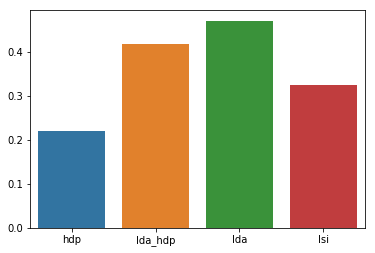

In [32]:
y = [hdp_coherence, lda_hdp_coherence, lda_coherence, lsi_coherence]
x = ['hdp', 'lda_hdp', 'lda', 'lsi']
sns.barplot(x, y)

## Comparing best # of topics

In [34]:
x = []
for i in range(5,20):
    ldamodel = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary)
    lda = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
    lda_coherence = CoherenceModel(topics=lda[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
    x.append(lda_coherence)

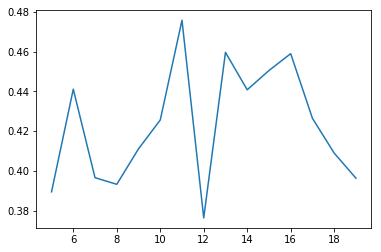

In [37]:
y = [i for i in range(5, 20)]
plt.plot(y, x)

In [38]:
from gensim.models.ldamulticore import LdaMulticore

In [60]:
x = []
for i in range(10,15):
    ldammult_model = LdaMulticore(corpus=corpus, num_topics=i, id2word=dictionary, workers=15)
    ldamult = [[word for word, prob in topic] for topicid, topic in ldammult_model.show_topics(formatted=False)]
    ldamult_coherence = CoherenceModel(topics=ldamult[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
    x.append(ldamult_coherence)

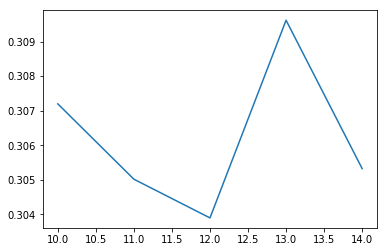

In [62]:
y = [i for i in range(10, 15)]
plt.plot(y, x)

## Comparing Speed

In [54]:
%%time
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

CPU times: user 3min 40s, sys: 8.48 s, total: 3min 49s
Wall time: 1min 41s


In [43]:
%%time
ldamodel_multc = LdaMulticore(corpus=corpus, num_topics=15, id2word=dictionary, workers=16)

CPU times: user 40.2 s, sys: 3.21 s, total: 43.4 s
Wall time: 35.1 s


In [64]:
ldamodel.show_topics()

[(4,
  '0.028*"child" + 0.014*"right" + 0.014*"want" + 0.012*"parent" + 0.011*"kid" + 0.010*"father" + 0.009*"life" + 0.009*"abortion" + 0.009*"mother" + 0.008*"woman"'),
 (8,
  '0.033*"think" + 0.026*"people" + 0.016*"thing" + 0.014*"work" + 0.014*"way" + 0.014*"like" + 0.014*"good" + 0.008*"problem" + 0.008*"mean" + 0.007*"change"'),
 (13,
  '0.091*"video" + 0.069*"gay" + 0.065*"boy" + 0.046*"girl" + 0.043*"video_game" + 0.037*"porn" + 0.022*"straight" + 0.020*"wow" + 0.016*"dog" + 0.013*"cat"'),
 (1,
  '0.099*"comment" + 0.076*"reddit_com" + 0.064*"r_femradebate" + 0.040*"http_www" + 0.027*"r" + 0.016*"b" + 0.015*"c" + 0.012*"user_tier" + 0.010*"ban_systerm" + 0.010*"text_rule"'),
 (2,
  '0.013*"term" + 0.013*"patriarchy" + 0.013*"think" + 0.012*"word" + 0.012*"definition" + 0.011*"people" + 0.011*"mean" + 0.010*"group" + 0.009*"use" + 0.009*"thing"'),
 (14,
  '0.079*"feminist" + 0.047*"feminism" + 0.028*"mra" + 0.026*"man" + 0.019*"movement" + 0.018*"issue" + 0.017*"mrm" + 0.016*"g

In [66]:
lda = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_coherence = CoherenceModel(topics=lda[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence

0.4013195491586288

In [52]:
lda_mc = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_mc_coherence = CoherenceModel(topics=lda[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [53]:
lda_mc_coherence

0.3963308355663578

In [67]:
p = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [69]:
pyLDAvis.save_html(p, 'test_model.html')

In [70]:
help(pyLDAvis.gensim.prepare)

Help on function prepare in module pyLDAvis.gensim:

prepare(topic_model, corpus, dictionary, doc_topic_dist=None, **kwargs)
    Transforms the Gensim TopicModel and related corpus and dictionary into
    the data structures needed for the visualization.
    
    Parameters
    ----------
    topic_model : gensim.models.ldamodel.LdaModel
        An already trained Gensim LdaModel. The other gensim model types are
        not supported (PRs welcome).
    
    corpus : array-like list of bag of word docs in tuple form or scipy CSC matrix
        The corpus in bag of word form, the same docs used to train the model.
        The corpus is transformed into a csc matrix internally, if you intend to
        call prepare multiple times it is a good idea to first call
        `gensim.matutils.corpus2csc(corpus)` and pass in the csc matrix instead.
    
    For example: [(50, 3), (63, 5), ....]
    
    dictionary: gensim.corpora.Dictionary
        The dictionary object used to create the corpus

## Dynamic Topic Modeling

In [71]:
from gensim.models.wrappers.dtmmodel import DtmModel

In [74]:
MR_corpus = MmCorpus('./data/MR_hdp_corpus.mm')

In [76]:
MR_dict =  Dictionary.load('./data/MR_hdp_dictionary.dict')

In [72]:
dtm_path = "./data/dtm/dtm-linux64"

In [84]:
years = [2014, 2015, 2016, 2017, 2018]
time_seq = []
for year in years:
    c = MmCorpus(f'./data/MR_hdp_corpus_{year}.mm')
    time_seq.append(len(c))

In [86]:
time_seq.append(len(MR_corpus) - sum(time_seq))

In [87]:
time_seq

[71955, 50918, 46675, 30821, 32740, 8924]

In [93]:
model = DtmModel(dtm_path, MR_corpus, time_seq, num_topics=10,
                 id2word=MR_dict, initialize_lda=True)

In [94]:
model.save("./lda/MR_dtm.gensim")

In [89]:
RP_corpus = MmCorpus('./data/RP_hdp_corpus.mm')
RP_dict =  Dictionary.load('./data/RP_hdp_dictionary.dict')
RP_time_seq = []
for year in years:
    c = MmCorpus(f'./data/RP_hdp_corpus_{year}.mm')
    RP_time_seq.append(len(c))
RP_time_seq.append(len(RP_corpus) - sum(RP_time_seq))

In [91]:
RP_time_seq

[593346, 429483, 391341, 365350, 321567, 38619]

In [ ]:
RP_model = DtmModel(dtm_path, RP_corpus, RP_time_seq, num_topics=10,
                 id2word=RP_dict, initialize_lda=True)

In [ ]:
RP_model.save("./lda/RP_dtm.gensim")

In [90]:
MGTOW_corpus = MmCorpus('./data/MGTOW_hdp_corpus.mm')
MGTOW_dict =  Dictionary.load('./data/MGTOW_hdp_dictionary.dict')
MGTOW_time_seq = []
for year in years:
    c = MmCorpus(f'./data/MGTOW_hdp_corpus_{year}.mm')
    MGTOW_time_seq.append(len(c))
MGTOW_time_seq.append(len(MGTOW_corpus) - sum(MGTOW_time_seq))

In [92]:
MGTOW_time_seq

[3167, 28320, 107383, 295802, 528241, 160932]

In [ ]:
MGTOW_model = DtmModel(dtm_path, MGTOW_corpus, MGTOW_time_seq, num_topics=10,
                 id2word=MGTOW_dict, initialize_lda=True)

In [ ]:
MGTOW_model.save("./lda/MGTOW_dtm.gensim")